# 15.1 다양한 시퀀스 모델링 기법 소개

In [1]:
#1. 모델링 입력 파라미터 결정: units은 rnn 레이어의 단어벡터 크기
import argparse
args = {
    "n_seq": 4,
    "d_model": 5,
    "units": 3,
    "n_out": 2,
    "seed": 1234
}
args = argparse.Namespace(**args)
args

Namespace(n_seq=4, d_model=5, units=3, n_out=2, seed=1234)

In [2]:
#2 임베딩 데이터 : '신차 디자인 연비 좋아요', '신차 엉터리로 개발했네요'
import numpy as np
embedding=np.array([[[ 0.02320199,  0.01021665, -0.00895445, -0.02979749, 0.02322428],
        [ 0.0264355 , -0.04554123,  0.04725628,  0.00859541, -0.04999509],
        [-0.03991654,  0.03636427,  0.0333014 , -0.00142573, 0.03086834],
        [-0.02713783, -0.02981646,  0.04198844, -0.0123964 , -0.00303965]],
       [[ 0.02320199,  0.01021665, -0.00895445, -0.02979749, 0.02322428],
        [-0.01625543,  0.04943212,  0.00923678,  0.04275037, 0.02018802],
        [ 0.02082664,  0.0197835 , -0.04465839,  0.03356267, -0.00063878],
        [ 0.00975098, -0.01968622,  0.04976818,  0.03082553, -0.00829091]]])
embedding.shape #(bs, n_seq, d_model)

(2, 4, 5)

In [3]:
#3. RNN 모델링, 그림16.2
import tensorflow as tf
rnn1 = tf.keras.layers.SimpleRNN(units=args.units)
hidden1 = rnn1(embedding)
rnn2 = tf.keras.layers.SimpleRNN(units=args.units, return_sequences=True)
hidden2 = rnn2(embedding)
hidden1.shape, hidden2.shape   # (bs, n_seq, units)

(TensorShape([2, 3]), TensorShape([2, 4, 3]))

In [4]:
print(hidden1)
print(hidden2)

tf.Tensor(
[[-0.10568792 -0.02458712  0.17039919]
 [-0.05495265  0.03742053  0.00530214]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[[-0.00949262  0.01239656 -0.00050656]
  [ 0.00453874  0.05925075 -0.00158553]
  [ 0.05586353  0.03986724 -0.02173125]
  [ 0.08149698  0.09169133 -0.00563255]]

 [[-0.00949262  0.01239656 -0.00050656]
  [-0.00288377 -0.03044254  0.03495883]
  [-0.02939887 -0.10024532  0.03323806]
  [-0.0420322  -0.05568251  0.06306101]]], shape=(2, 4, 3), dtype=float32)


In [5]:
#4 단방향 및 양방향 LSTM 모델
lstm = tf.keras.layers.LSTM(units=args.units, return_sequences=True)
lstm_hidden = lstm(embedding)  # (bs, n_seq, units)

lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=args.units, return_sequences=True))
bi_lstm_hidden = lstm(embedding)
bi_lstm_hidden.shape   # (bs, n_seq, units*2)

TensorShape([2, 4, 6])

In [6]:
print(lstm_hidden)
print(bi_lstm_hidden)

tf.Tensor(
[[[-0.0056398   0.00214725  0.00186421]
  [ 0.00739955 -0.00664912  0.01151628]
  [ 0.0047343   0.00289605 -0.00084534]
  [ 0.00951243  0.00682782  0.00026281]]

 [[-0.0056398   0.00214725  0.00186421]
  [-0.00089116  0.00065462 -0.00848445]
  [-0.00372702 -0.00620416 -0.00779616]
  [ 0.00729027 -0.01002148 -0.00285836]]], shape=(2, 4, 3), dtype=float32)
tf.Tensor(
[[[ 1.1151750e-03 -5.6212777e-03 -3.4577709e-03  2.2410625e-03
    6.2911659e-03 -1.5424598e-04]
  [-8.4841956e-04  5.1844334e-03 -1.0218224e-02  4.3628486e-03
    7.4103251e-03  3.5357068e-03]
  [-1.1957602e-03  6.3822181e-03 -3.6571585e-03 -3.2743169e-03
   -7.4951298e-04 -4.9996353e-03]
  [-3.1145278e-03  1.3693329e-02 -2.9127449e-03  3.3752602e-03
    1.6936094e-03  1.6627740e-03]]

 [[ 1.1151750e-03 -5.6212777e-03 -3.4577709e-03 -1.1626034e-02
   -3.6490229e-03 -7.0845867e-03]
  [-1.6307575e-03 -3.9781923e-03  3.9024500e-03 -1.4101889e-02
   -4.5718849e-03 -7.8911362e-03]
  [-1.0194210e-03 -9.2332615e-03  6.3

# 15.2 감정분류 분석을 위한 모델링 디자인

In [7]:
# 5. 모델링 디자인
import argparse
args = {
    "n_vocab": 32007,
    "n_seq": 65,
    "d_model": 256,
    "units": 256,
    "n_out": 2,
    "seed": 1234
}
args = argparse.Namespace(**args)
args

Namespace(n_vocab=32007, n_seq=65, d_model=256, units=256, n_out=2, seed=1234)

In [8]:
#6 필요한 라이브러리 설치 및 단어사전 다운로드
!pip install sentencepiece
!wget https://github.com/byungjooyoo/Dataset/raw/main/kowiki_32000.model

--2024-05-12 05:46:16--  https://github.com/byungjooyoo/Dataset/raw/main/kowiki_32000.model
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/byungjooyoo/Dataset/main/kowiki_32000.model [following]
--2024-05-12 05:46:16--  https://raw.githubusercontent.com/byungjooyoo/Dataset/main/kowiki_32000.model
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 814744 (796K) [application/octet-stream]
Saving to: ‘kowiki_32000.model’

kowiki_32000.model  100%[===================>] 795.65K  --.-KB/s    in 0.03s   

2024-05-12 05:46:17 (25.8 MB/s) - ‘kowiki_32000.model’ saved [814744/814744]



# 15.3 데이터 준비 단계

In [10]:
#7 네이버 영화 리뷰 데이터 다운로드 및 결측치 제거
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/byungjooyoo/Dataset/main/movie_comment.csv', index_col=False)[['Title','Score','Comment']]
df.dropna()
df

,Title,Score,Comment
0,듄,1,대놓고 2편의 예고편....나중에 2편나올때 케이블에서 다시보면될정도...
1,라스트 듀얼: 최후의 결투,6,난또 라스트제다이 스핀오프편인줄 알았네..ㅡㅡ
2,그래비티,10,단순한 우주재난 영화가 아닌 '죽음과 삶'이라는 주제를 담고 있는 영화.. 최고의 ...
3,프리 가이,10,큰 기대 없이 지나가다가 TV에서 광고만 보고 재밌겠다 싶어서 봤는데 ㅋㅋㅋ 생각보...
4,듄,10,'두려움은 마음을 죽인다. 두려움이 사라지면 나만 오롯이 남는다.' 이미 다음편이 ...
...,...,...,...
9985,레옹 디 오리지널,2,디 오리지널은 개뿔 앞뒤 다 잘라놓고 오리지널? 오리지널 뜻 모르냐?
9986,엑시트,10,보고나서도 입꼬리가 내려가질 않아요ㅎㅎ 건강한 코미디라는 말이 딱 맞는듯. 영화관에...
9987,코다,10,소재가 독특한데 19금 유머와 함께여서 자칫 어두울 수 있는 현실이 웃음으로 잘 승...
9988,모리타니안,10,실화를 떠나 몰입할 수 밖에 없는 스토리.. 실감나는 배우들의 연기력.. 실화와 관...


In [11]:
#8. vocab loading
import sentencepiece as spm
vocab = spm.SentencePieceProcessor()
vocab.load('kowiki_32000.model')

True

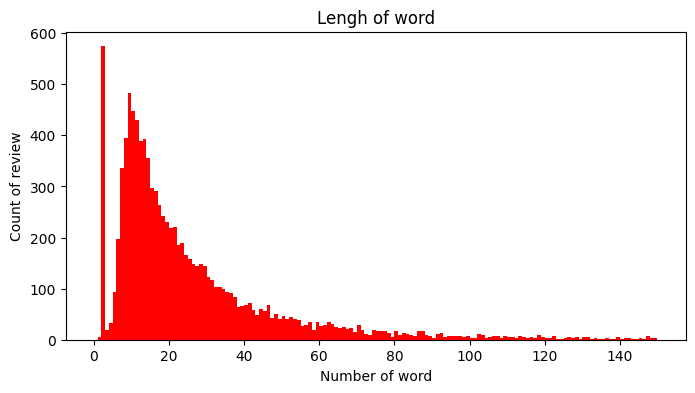

In [12]:
#9 탐색적 데이터 분석 : document 길이 데이터
import matplotlib.pyplot as plt
train_length = df["Comment"].astype("str").apply(lambda x:len(vocab.encode_as_pieces(x)))
plt.figure(figsize=(8, 4))
plt.hist(train_length, bins=150, range=[0, 150], facecolor='r', label='word')
plt.title('Lengh of word')
plt.xlabel('Number of word')
plt.ylabel('Count of review')
plt.show()

In [13]:
# 길이의 분포, 토큰 두개가 574개로 가장 많음
train_length.value_counts()[:10]

Comment
2     574
9     482
10    448
11    429
8     395
13    393
12    388
14    355
7     336
15    297
Name: count, dtype: int64

In [14]:
# 데이터 길이
print(f"token 길이 최대:    {np.max(train_length):4d}")
print(f"token 길이 최소:    {np.min(train_length):4d}")
print(f"token 길이 평균:    {np.mean(train_length):7.2f}")
print(f"token 길이 표준편차: {np.std(train_length):7.2f}")

token 길이 최대:     483
token 길이 최소:       1
token 길이 평균:      27.37
token 길이 표준편차:   33.08


In [15]:
#10. 워드입베딩 입력 토큰 시퀀스 설정
import math
percentile25 = np.percentile(train_length, 25)
percentile75 = np.percentile(train_length, 75)
percentileIQR = percentile75 - percentile25
percentileMAX = percentile75 + percentileIQR * 1.5
args.n_seq = math.ceil(percentileMAX)
args.n_seq

65

Score
10    4663
1     1070
8      986
6      758
2      641
9      551
7      515
4      456
5      233
3      117
Name: count, dtype: int64


<Axes: >

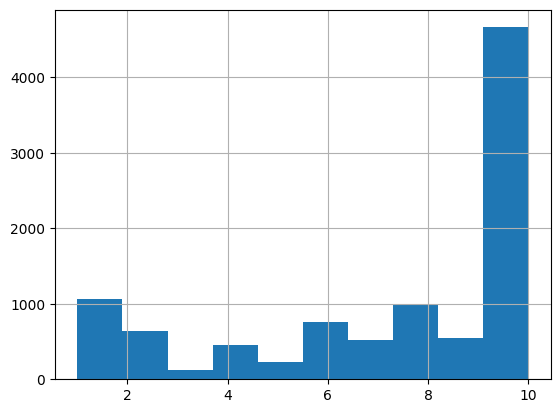

In [16]:
# 점수별 빈도수
print(df['Score'].value_counts())
df['Score'].hist()

y
1    6715
0    3275
Name: count, dtype: int64


<Axes: >

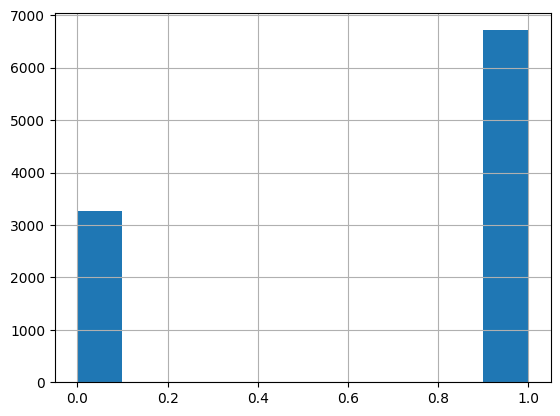

In [17]:
#11. 점수를 기준으로 이항 클래스로 변환 : 긍정(7-10)과 부정(1-6)으로 변환
def rating_to_label(rating):
    if rating > 6:
        return 1
    else:
        return 0
df['y'] = df['Score'].apply(lambda x: rating_to_label(x))
id_to_label = {0: "부정", 1: "긍정"}
print(df['y'].value_counts())
df['y'].hist()

In [18]:
df[:10]

,Title,Score,Comment,y
0,듄,1,대놓고 2편의 예고편....나중에 2편나올때 케이블에서 다시보면될정도...,0
1,라스트 듀얼: 최후의 결투,6,난또 라스트제다이 스핀오프편인줄 알았네..ㅡㅡ,0
2,그래비티,10,단순한 우주재난 영화가 아닌 '죽음과 삶'이라는 주제를 담고 있는 영화.. 최고의 ...,1
3,프리 가이,10,큰 기대 없이 지나가다가 TV에서 광고만 보고 재밌겠다 싶어서 봤는데 ㅋㅋㅋ 생각보...,1
4,듄,10,'두려움은 마음을 죽인다. 두려움이 사라지면 나만 오롯이 남는다.' 이미 다음편이 ...,1
5,군함도,1,"억지다 역겹네;'',,;; ;",0
6,군함도,1,"억지다 역겹네;'',,;; ;",0
7,라스트 듀얼: 최후의 결투,10,리들리 스콧 감독 영화라고 해서 봤는데 프리가이에 나왔던 조디 코머도 나와서 반가웠...,1
8,듄,10,시각과 청각의 음미만으로도 감칠맛이 넘친다..,1
9,베놈 2: 렛 데어 비 카니지,1,쿠키랑 베놈에디 투닥거리는거 봐서 1점이다...,0


In [19]:
# 12. 분석용 데이터프레임으로 정리 : 불필요한 변수 제거
df = df[['y', 'Comment']]
df

,y,Comment
0,0,대놓고 2편의 예고편....나중에 2편나올때 케이블에서 다시보면될정도...
1,0,난또 라스트제다이 스핀오프편인줄 알았네..ㅡㅡ
2,1,단순한 우주재난 영화가 아닌 '죽음과 삶'이라는 주제를 담고 있는 영화.. 최고의 ...
3,1,큰 기대 없이 지나가다가 TV에서 광고만 보고 재밌겠다 싶어서 봤는데 ㅋㅋㅋ 생각보...
4,1,'두려움은 마음을 죽인다. 두려움이 사라지면 나만 오롯이 남는다.' 이미 다음편이 ...
...,...,...
9985,0,디 오리지널은 개뿔 앞뒤 다 잘라놓고 오리지널? 오리지널 뜻 모르냐?
9986,1,보고나서도 입꼬리가 내려가질 않아요ㅎㅎ 건강한 코미디라는 말이 딱 맞는듯. 영화관에...
9987,1,소재가 독특한데 19금 유머와 함께여서 자칫 어두울 수 있는 현실이 웃음으로 잘 승...
9988,1,실화를 떠나 몰입할 수 밖에 없는 스토리.. 실감나는 배우들의 연기력.. 실화와 관...


In [20]:
df[:5]

,y,Comment
0,0,대놓고 2편의 예고편....나중에 2편나올때 케이블에서 다시보면될정도...
1,0,난또 라스트제다이 스핀오프편인줄 알았네..ㅡㅡ
2,1,단순한 우주재난 영화가 아닌 '죽음과 삶'이라는 주제를 담고 있는 영화.. 최고의 ...
3,1,큰 기대 없이 지나가다가 TV에서 광고만 보고 재밌겠다 싶어서 봤는데 ㅋㅋㅋ 생각보...
4,1,'두려움은 마음을 죽인다. 두려움이 사라지면 나만 오롯이 남는다.' 이미 다음편이 ...


In [21]:
# iterrows 메소드
df1=df[:5]
for i, row in tqdm(df1.iterrows(), total=len(df1)):
  if i>5:
    break
  print(i, row['y'], vocab.encode_as_ids(row['Comment']))

NameError: name 'tqdm' is not defined

In [22]:
# 13 데이터 임베딩 함수(패딩으로 길이맞춰서) : 입력변수 데이터프레임(df), 단어사전(vocab), 입력시퀀스 토큰길이(n_seq)
from tqdm.notebook import tqdm, trange
import numpy as np
def make_data(df, vocab, n_seq=args.n_seq):
  inputs, labels = [], []
  for i, row in tqdm(df.iterrows(), total=len(df)):
      label = row['y']
      document = row['Comment']
      token = vocab.encode_as_ids(str(document))
      token = token[:n_seq]
      token = token + [0] * (n_seq - len(token))
      assert len(token) == n_seq
      inputs.append(token)
      labels.append(label)
  inputs = np.array(inputs)
  labels = np.array(labels)
  return inputs, labels

inputs, labels = make_data(df, vocab, n_seq=args.n_seq)
inputs.shape, labels.shape

  0%|          | 0/9990 [00:00<?, ?it/s]

((9990, 65), (9990,))

In [23]:
print(inputs)
print(labels)


[[  235  9432    38 ...     0     0     0]
 [  767 17041   545 ...     0     0     0]
 [ 4745  1249   357 ...     0     0     0]
 ...
 [ 3037    19  3862 ...     0     0     0]
 [ 1038  2612  2184 ...     0     0     0]
 [  505   824   823 ...     0     0     0]]
[0 0 1 ... 1 1 1]


In [24]:
# 14. 데이터를  20%씩 test 데이터와 val 데이터로 분리
from sklearn.model_selection import train_test_split
train_inputs, test_inputs, train_labels, test_labels = train_test_split(inputs, labels, test_size=0.2, random_state=args.seed)
train_inputs, valid_inputs, train_labels, valid_labels = train_test_split(train_inputs, train_labels, test_size=0.2, random_state=args.seed)
train_inputs.shape, train_labels.shape

((6393, 65), (6393,))

In [25]:
print(valid_inputs.shape, valid_labels.shape)
print(test_inputs.shape, test_labels.shape)

(1599, 65) (1599,)
(1998, 65) (1998,)


# 15.4 모델링과 학습 단계

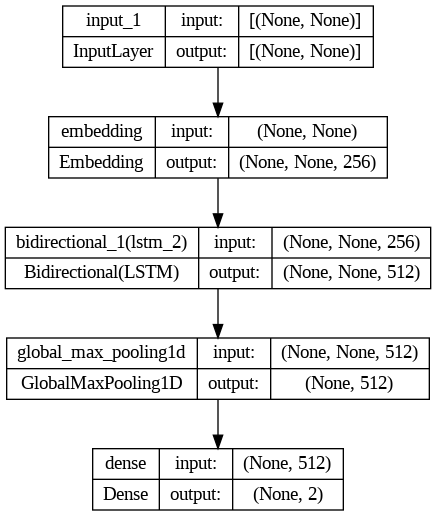

In [26]:
#15. 양방향 LSTM 모델링 정의
import tensorflow as tf

def build_model(args):
    inputs = tf.keras.layers.Input((None,))

    embedding = tf.keras.layers.Embedding(args.n_vocab, args.d_model)
    hidden = embedding(inputs)

    # modeling 선택 입력 부분 : RNN, CNN, Attention, Linear 등으로 입력
    lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=args.units, return_sequences=True))
    hidden = lstm(hidden)
    # 데이터의 특징 추출
    pool = tf.keras.layers.GlobalMaxPooling1D()
    hidden = pool(hidden)
    linear = tf.keras.layers.Dense(args.n_out, activation=tf.nn.softmax)
    y_pred = linear(hidden)

    model = tf.keras.Model(inputs=inputs, outputs=y_pred)
    return model

model = build_model(args)
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [27]:
#16. 학습
model = build_model(args)
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
save_weights = tf.keras.callbacks.ModelCheckpoint("movie.hdf5",
                                                  monitor='val_accuracy',
                                                  verbose=1,
                                                  save_best_only=True,
                                                  mode="max",
                                                  save_freq="epoch",
                                                  save_weights_only=True)
csv_logger = tf.keras.callbacks.CSVLogger("movie.csv")
history = model.fit(train_inputs, train_labels,
                    epochs=20,
                    batch_size=256,
                    validation_data=(valid_inputs, valid_labels),
                    callbacks=[early_stopping, save_weights, csv_logger])

Epoch 1/20
25/25 [==============================] - ETA: 0s - loss: 0.6172 - accuracy: 0.6787
Epoch 1: val_accuracy improved from -inf to 0.71107, saving model to movie.hdf5
25/25 [==============================] - 9s 182ms/step - loss: 0.6172 - accuracy: 0.6787 - val_loss: 0.5823 - val_accuracy: 0.7111
Epoch 2/20
25/25 [==============================] - ETA: 0s - loss: 0.4441 - accuracy: 0.7859
Epoch 2: val_accuracy improved from 0.71107 to 0.78111, saving model to movie.hdf5
25/25 [==============================] - 3s 107ms/step - loss: 0.4441 - accuracy: 0.7859 - val_loss: 0.4652 - val_accuracy: 0.7811
Epoch 3/20
25/25 [==============================] - ETA: 0s - loss: 0.2777 - accuracy: 0.8907
Epoch 3: val_accuracy did not improve from 0.78111
25/25 [==============================] - 2s 95ms/step - loss: 0.2777 - accuracy: 0.8907 - val_loss: 0.5487 - val_accuracy: 0.7805
Epoch 4/20
25/25 [==============================] - ETA: 0s - loss: 0.1817 - accuracy: 0.9351
Epoch 4: val_accur

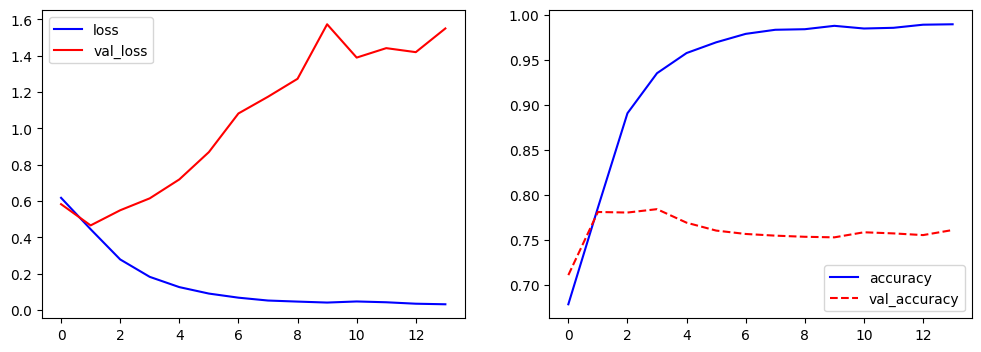

In [28]:
# 17. 학습결과 손실함수와 정확도 확인
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r-', label='val_loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.legend()
plt.show()

# 15.5 평가 및 배포 단계

In [29]:
#18 모델 평가
model.load_weights("movie.hdf5")
model.evaluate(test_inputs, test_labels)

63/63 [==============================] - 0s 7ms/step - loss: 0.5460 - accuracy: 0.7948


[0.5459910035133362, 0.7947947978973389]

63/63 [==============================] - 1s 4ms/step


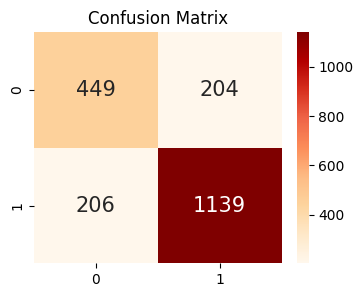

In [30]:
#19. confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = model.predict(test_inputs)
y_class = np.argmax(y_pred, axis=-1)

c_mat = confusion_matrix(y_pred = y_class, y_true = test_labels)
plt.figure(figsize=(4, 3))
sns.heatmap(c_mat, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()


In [31]:
# Confusion Matrix : 앞에 나오는 것이 좌측 index, 뒤에가 아래 인덱스 (통상 실제, 예측순으로 )
# TN, FP
# FN, TP
confusion_matrix(y_true=[0,0,0,0,1,1,1,1,1,1], y_pred=[0,0,0,1,1,1,1,1,0,0])

array([[3, 1],
       [2, 4]])

In [32]:
#19. 정확도 측정 지표
pd.options.display.float_format = '{:.2f}'.format
tp = c_mat[1, 1]
tn = c_mat[0, 0]
fp = c_mat[0, 1]
fn = c_mat[1, 0]
accuracy = (tp + tn) / max((tp + tn + fp + fn), 1)
precision = (tp) / max((tp + fp), 1)
recall = (tp) / max((tp + fn), 1)
f1 = 2 * (precision * recall) / max((precision + recall), 0.1)

table = pd.DataFrame([accuracy, precision, recall,f1]).T
table.columns=['Accuracy(정확도)', 'Precision(정밀도)', 'Recall(재현율)', 'F1']
table

,Accuracy(정확도),Precision(정밀도),Recall(재현율),F1
0,0.79,0.85,0.85,0.85


In [33]:
#20. 배포
model = build_model(args)
model.load_weights("movie.hdf5")
def do_predict(model, string):
    infer_input = vocab.encode_as_ids(string)
    infer_input = np.array([infer_input])
    y_pred = model.predict(infer_input)
    y_class = np.argmax(y_pred, axis=-1)[0]
    return id_to_label[y_class]

string = "영화가 너무 심심해요"
do_predict(model, string)

1/1 [==============================] - 1s 648ms/step


'부정'

In [34]:
# 예측 과정
infer_input = vocab.encode_as_ids(string)
infer_input = np.array([infer_input])
infer_input

array([[ 284,   19, 2360,  732,  690,   61,  489]])

In [35]:
train_inputs.shape, infer_input.shape

((6393, 65), (1, 7))

In [36]:
y_pred = model.predict(infer_input)
y_pred

1/1 [==============================] - 0s 20ms/step


array([[0.89341515, 0.10658488]], dtype=float32)

In [37]:
import numpy as np
y_class = np.argmax(y_pred, axis=-1)[0]
print(f"{string} : {id_to_label[y_class]}")

영화가 너무 심심해요 : 부정


In [38]:
do_predict(model, string)

1/1 [==============================] - 0s 16ms/step


'부정'

In [39]:
#21 대화형으로 배포
# 영화 재미없어요, 배우들이 연기를 너무 잘합니다, 너무 심심해, 다음에 다시 보고싶어요
while True:
    print("input> ", end="")
    string = str(input())
    if len(string) == 0:
        break
    result = do_predict(model, string)
    print(result)

input> 영화 재미없어요
1/1 [==============================] - 1s 600ms/step
부정
input> 배우들이 연기를 너무 잘합니다
1/1 [==============================] - 0s 18ms/step
긍정
input> 너무 심심해
1/1 [==============================] - 0s 17ms/step
부정
input> 
